# 4.1a_Aggregate AETI on crop season basis

Get the list of all corrected AETI rasters in the folder

In [1]:
import glob

input_folder=r'E:\WaPORAnalysis\3aL3_AETI_AWA_D_Clipped_corrected'   
input_fhs=glob.glob(input_folder+'\*.tif')
input_fhs

['E:\\WaPORAnalysis\\3aL3_AETI_AWA_D_Clipped_corrected\\L3_AETI_0901_AWA.tif',
 'E:\\WaPORAnalysis\\3aL3_AETI_AWA_D_Clipped_corrected\\L3_AETI_0902_AWA.tif',
 'E:\\WaPORAnalysis\\3aL3_AETI_AWA_D_Clipped_corrected\\L3_AETI_0903_AWA.tif',
 'E:\\WaPORAnalysis\\3aL3_AETI_AWA_D_Clipped_corrected\\L3_AETI_0904_AWA.tif',
 'E:\\WaPORAnalysis\\3aL3_AETI_AWA_D_Clipped_corrected\\L3_AETI_0905_AWA.tif',
 'E:\\WaPORAnalysis\\3aL3_AETI_AWA_D_Clipped_corrected\\L3_AETI_0906_AWA.tif',
 'E:\\WaPORAnalysis\\3aL3_AETI_AWA_D_Clipped_corrected\\L3_AETI_0907_AWA.tif',
 'E:\\WaPORAnalysis\\3aL3_AETI_AWA_D_Clipped_corrected\\L3_AETI_0908_AWA.tif',
 'E:\\WaPORAnalysis\\3aL3_AETI_AWA_D_Clipped_corrected\\L3_AETI_0909_AWA.tif',
 'E:\\WaPORAnalysis\\3aL3_AETI_AWA_D_Clipped_corrected\\L3_AETI_0910_AWA.tif',
 'E:\\WaPORAnalysis\\3aL3_AETI_AWA_D_Clipped_corrected\\L3_AETI_0911_AWA.tif',
 'E:\\WaPORAnalysis\\3aL3_AETI_AWA_D_Clipped_corrected\\L3_AETI_0912_AWA.tif',
 'E:\\WaPORAnalysis\\3aL3_AETI_AWA_D_Clipped_correct

Get the available raster info table

In [2]:
import hkvwaporpy as hkv
df=hkv.read_wapor.get_catalogus()
ds_code='L3_AETI_AWA_D' 
cube_info=hkv.read_wapor.get_info_cube(cube_code=ds_code)
df_avail=hkv.read_wapor.get_data_availability(cube_info=cube_info,time_range='[2009-01-01,2019-06-30]')

data_avail_period: DEKAD


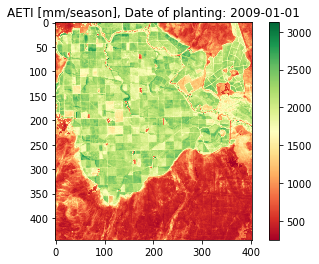

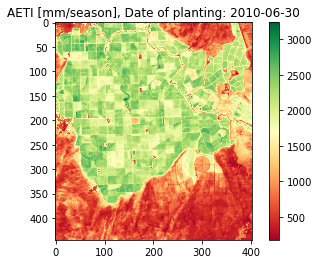

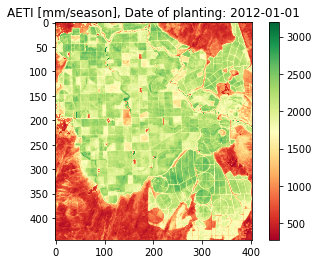

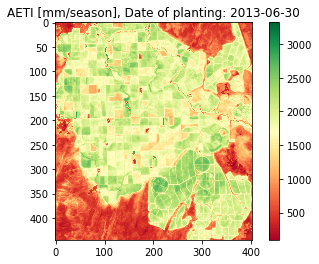

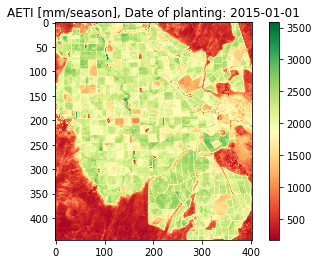

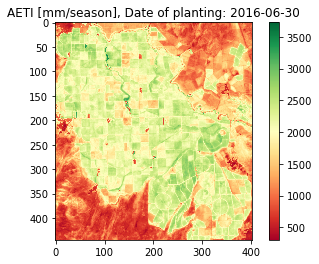

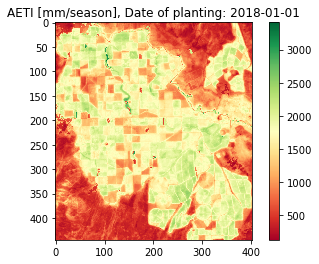

In [3]:
import pandas as pd
import numpy as np
from osgeo import gdal
from matplotlib import pyplot as plt
import os
from matplotlib import pyplot as plt
import time

def OpenRasterAsArray(in_fh,nan_value=True,bandnumber=1,dtype='float32'):  
    SourceDataSet = gdal.Open(in_fh, gdal.GA_ReadOnly)    
    Subdataset = SourceDataSet.GetRasterBand(bandnumber)
    NDV = Subdataset.GetNoDataValue()
    Array = Subdataset.ReadAsArray().astype(dtype)
    if nan_value:
        Array[Array == NDV] = np.nan
    return Array

def SumSeason(in_fh, sowing_date, harvesting_date):
    period_dates=pd.date_range(sowing_date,harvesting_date,freq='D')
    period_fhs=[]
    for in_fh in input_fhs:
        #get raster id from file name
        raster_id=os.path.split(in_fh)[-1].split('.')[0]
        #get raster info using raster id
        raster_info=df_avail.loc[df_avail['raster_id']==raster_id]
        #get time string
        startstr=raster_info['start_dekad'].iloc[0]
        endstr=raster_info['end_dekad'].iloc[0]
        yearstr=raster_info.index[0]
        #get start and end date of raster
        raster_startdate=pd.Timestamp(int(yearstr),int(startstr[0:2]),int(startstr[2:4]),0)
        raster_enddate=pd.Timestamp(int(yearstr),int(endstr[0:2]),int(endstr[2:4]),0)
        #check if raster belong to period
        if ((raster_startdate in period_dates) or (raster_enddate in period_dates)):
            period_fhs.append(in_fh)
    period_fhs
   
    period_fh=period_fhs[0]
    Sums=0
    for period_fh in period_fhs:
        Sum=OpenRasterAsArray(period_fh)
        Sums+=Sum
    plt.imshow(Sums, cmap='RdYlGn')
    plt.colorbar()
    plt.title('AETI [mm/season], Date of planting: {}'.format(sowing_date))
    plt.show()    
    return (Sums)

#Calculate seasonal AETI given the planting and harvestind date
AETIseason1=SumSeason(input_fhs, '2009-01-01','2010-06-30')
AETIseason2=SumSeason(input_fhs, '2010-06-30','2011-12-31')
AETIseason3=SumSeason(input_fhs, '2012-01-01','2013-06-30')
AETIseason4=SumSeason(input_fhs, '2013-06-30','2014-12-31')
AETIseason5=SumSeason(input_fhs, '2015-01-01','2016-06-30')
AETIseason6=SumSeason(input_fhs, '2016-06-30','2017-12-31')
AETIseason7=SumSeason(input_fhs, '2018-01-01','2019-06-30')

### Exercise (4.1)
Calculate the NPP per crop season for sugarcane in Wonji 
(4.2)Calculate the WP and LP per season

# 4.1b_Aggregate NPP on crop season basis

Get the list of all corrected NPP rasters in the folder

In [8]:
import glob

input_folder=r'E:\WaPORAnalysis\3bL3_NPP_AWA_D_Clipped_corrected'   
input_fhs=glob.glob(input_folder+'\*.tif')
#input_fhs

Get the available raster info table

In [9]:
import hkvwaporpy as hkv
df=hkv.read_wapor.get_catalogus()
ds_code='L3_NPP_AWA_D' 
cube_info=hkv.read_wapor.get_info_cube(cube_code=ds_code)
df_avail=hkv.read_wapor.get_data_availability(cube_info=cube_info,time_range='[2008-01-01,2019-06-30]')

data_avail_period: DEKAD


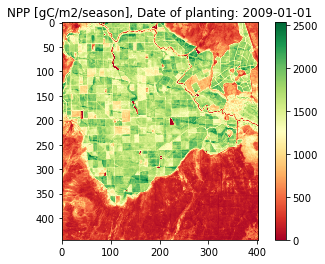

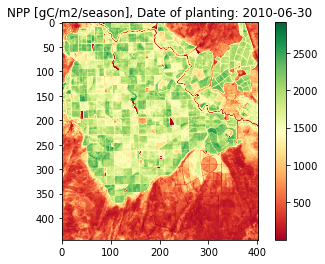

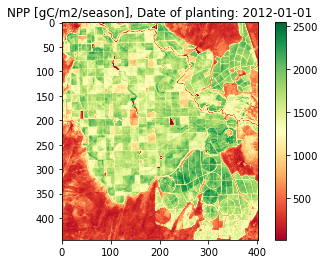

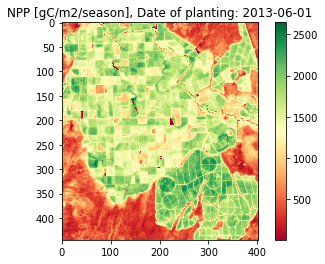

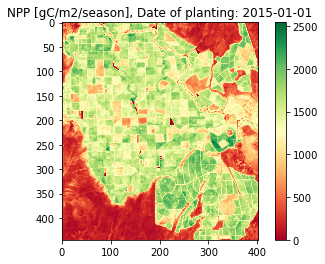

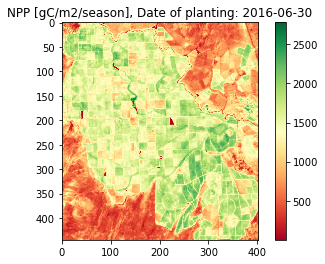

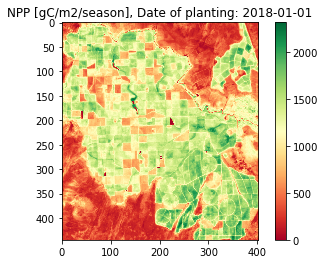

In [10]:
import pandas as pd
import numpy as np
from osgeo import gdal
from matplotlib import pyplot as plt
import os
from matplotlib import pyplot as plt
import hkvwaporpy as hkv


def OpenRasterAsArray(in_fh,nan_value=True,bandnumber=1,dtype='float32'):  
    SourceDataSet = gdal.Open(in_fh, gdal.GA_ReadOnly)    
    Subdataset = SourceDataSet.GetRasterBand(bandnumber)
    NDV = Subdataset.GetNoDataValue()
    Array = Subdataset.ReadAsArray().astype(dtype)
    if nan_value:
        Array[Array == NDV] = np.nan
    return Array

def SumSeason(in_fh, sowing_date, harvesting_date):
    period_dates=pd.date_range(sowing_date,harvesting_date,freq='D')
    period_fhs=[]
    for in_fh in input_fhs:
        #get raster id from file name
        raster_id=os.path.split(in_fh)[-1].split('.')[0]
        #get raster info using raster id
        raster_info=df_avail.loc[df_avail['raster_id']==raster_id]
        #get time string
        startstr=raster_info['start_dekad'].iloc[0]
        endstr=raster_info['end_dekad'].iloc[0]
        yearstr=raster_info.index[0]
        #get start and end date of raster
        raster_startdate=pd.Timestamp(int(yearstr),int(startstr[0:2]),int(startstr[2:4]),0)
        raster_enddate=pd.Timestamp(int(yearstr),int(endstr[0:2]),int(endstr[2:4]),0)
        #check if raster belong to period
        if ((raster_startdate in period_dates) or (raster_enddate in period_dates)):
            period_fhs.append(in_fh)
    period_fhs
   
    period_fh=period_fhs[0]
    Sums=0
    for period_fh in period_fhs:  
        Sum=OpenRasterAsArray(period_fh)
        Sums+=Sum
    plt.imshow(Sums, cmap='RdYlGn')
    plt.colorbar()
    plt.title('NPP [gC/m2/season], Date of planting: {}'.format(sowing_date))
    plt.show()    
    return (Sums)

#Calculate seasonal NPP given the planting and harvestind date
NPPseason1=SumSeason(input_fhs, '2009-01-01','2010-06-30')
NPPseason2=SumSeason(input_fhs, '2010-06-30','2011-12-31')
NPPseason3=SumSeason(input_fhs, '2012-01-01','2013-06-30')
NPPseason4=SumSeason(input_fhs, '2013-06-01','2014-12-31')
NPPseason5=SumSeason(input_fhs, '2015-01-01','2016-06-30')
NPPseason6=SumSeason(input_fhs, '2016-06-30','2017-12-31')
NPPseason7=SumSeason(input_fhs, '2018-01-01','2019-06-30')

# 4.2_Calculate WP and LP

***Land productivity*** is the ***total fresh biomass production*** per season. It is derived from the NPP aggregated over crop season.

    E.g. the NPP per season = V [gC/m²/season] 
    
                  = V*22.222 [kgDM/ha/season], b/s 1 gC/m²/day (NPP) = 22.222 kgDM/ha/day (DMP)
                        
                  = V*22.222/1000 [tonDM/ha/season], b/s 1ton=1000kg
                        
***Fresh biomass production = DMP/(1-moistureContent), for C3 crops***

                         = V*22.222/1000[ton fresh/ha/season]/(1-moistureContent[-])
                        
***Fresh biomass production = 1*DMP/(1-moistureContent), for C4 crops such as sugarcane***

                         = 1.8*V*22.222/1000[ton fresh/ha/season]/(1-moistureContent[-])

***Calculation of land productivity in ton/ha/season***

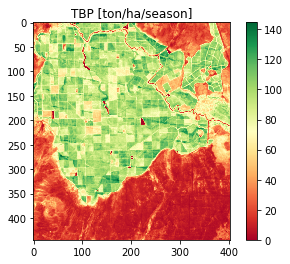

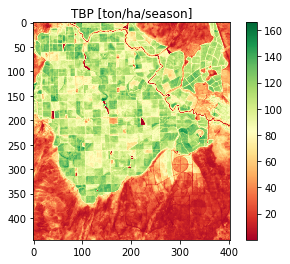

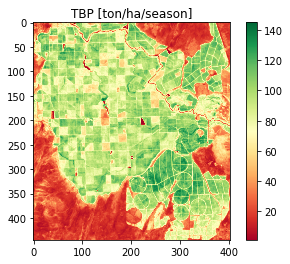

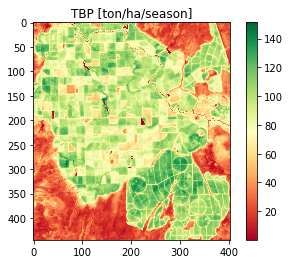

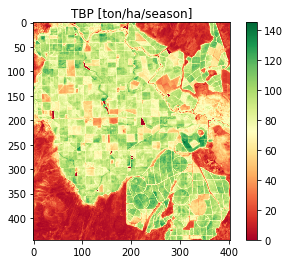

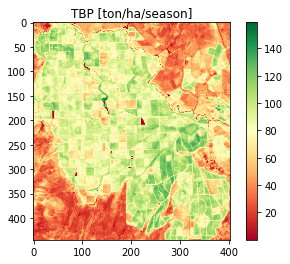

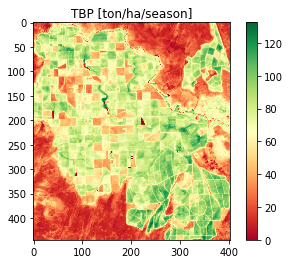

In [11]:
LP1=(1.8*NPPseason1*22.222/1000)/(1-0.3)
LP2=(1.8*NPPseason2*22.222/1000)/(1-0.3)
LP3=(1.8*NPPseason3*22.222/1000)/(1-0.3)
LP4=(1.8*NPPseason4*22.222/1000)/(1-0.3)
LP5=(1.8*NPPseason5*22.222/1000)/(1-0.3)
LP6=(1.8*NPPseason6*22.222/1000)/(1-0.3)
LP7=(1.8*NPPseason7*22.222/1000)/(1-0.3)

LPs=[LP1,LP2,LP3,LP4,LP5,LP6,LP7]
for LP in LPs:
    plt.imshow(LP, cmap='RdYlGn')
    plt.colorbar()
    plt.title('TBP [ton/ha/season]')
    plt.show()  

***Wapter productivity is the ratio of total fresh biomass production [ton/ha/season] to AETI [mm/season]***
...1 ton/ha/mm= 100 kg/m3

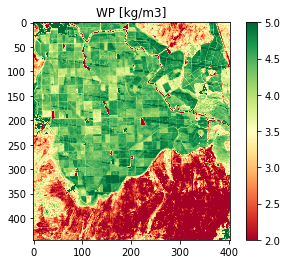

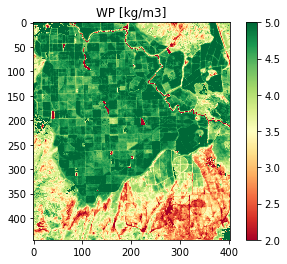

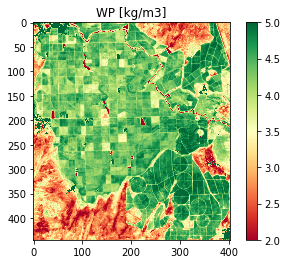

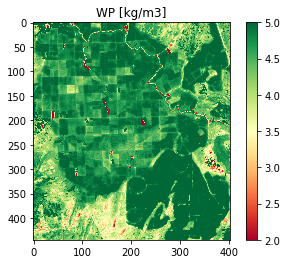

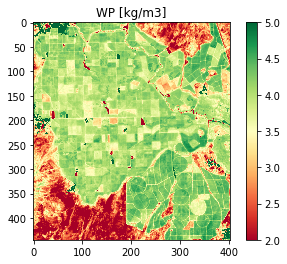

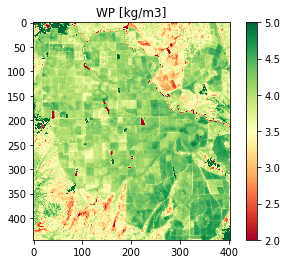

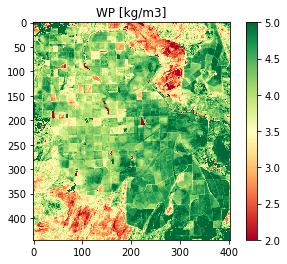

In [12]:
WP1=LP1/AETIseason1*100
WP2=LP2/AETIseason2*100
WP3=LP3/AETIseason3*100
WP4=LP4/AETIseason4*100
WP5=LP5/AETIseason5*100
WP6=LP6/AETIseason6*100
WP7=LP7/AETIseason7*100

WPs=[WP1,WP2,WP3,WP4,WP5,WP6,WP7]
for WP in WPs:
    plt.imshow(WP, cmap='RdYlGn')
    plt.colorbar()
    plt.clim(2,5)
    plt.title('WP [kg/m3]')
    plt.show()